In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('crop_yield.csv')
dataset.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [6]:
dataset_backup = dataset.copy()

In [ ]:
dataset.info() # Not null value exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [ ]:
dataset.columns # total columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [ ]:
dataset['Yield_tons_per_hectare'].mean() # average is 4.64....
dataset['Yield_tons_per_hectare'].max() # 9.96....
dataset['Yield_tons_per_hectare'].min() # -1.1476... How it can be negative????


np.float64(-1.147613222534901)

In [ ]:
# First I want to see the credentials of the field where yield is negative
negative_yield_rows = dataset[dataset['Yield_tons_per_hectare'] < 0]
print(negative_yield_rows.shape) # There are just 231 values out of 10lac which have negative values
# Now see the dataset's all columns in which Yield is negative
print(negative_yield_rows.head(102)) # I am printing just first 2 rows because short of output space
# There are soil_type like peaty, chalky, silt, clay, loam etc



(231, 10)
       Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
756      East     Peaty   Cotton   101.019421            33.804131   
7799    South    Chalky     Rice   108.804894            18.004082   
8421     East    Chalky  Soybean   168.120735            38.473430   
9553    North      Silt    Wheat   156.607973            16.610257   
15435   South    Chalky    Maize   177.481344            27.719742   
...       ...       ...      ...          ...                  ...   
385530  South      Loam     Rice   125.622221            18.123291   
387230   East      Clay    Wheat   120.566565            20.118107   
398615   West      Loam     Rice   115.233644            27.802440   
399695   East      Silt   Barley   141.960815            16.319845   
400756  North    Chalky     Rice   131.606965            31.413911   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
756               False            False             Rainy            

In [ ]:
dataset_Peaty = dataset[dataset['Soil_Type'] == 'Peaty'] # But Peaty Soil_type are 166283 there in the dataset it means
# its not necessary for soil_type is reasoning for the negative yield
dataset_Peaty.shape 

(166283, 10)

In [ ]:
dataset_Chalkyy = dataset[dataset['Soil_Type'] == 'Chalky'] # But Peaty Soil_type are 166779 there in the dataset it means
# its not necessary for soil_type is reasoning for the negative yield
dataset_Chalkyy.shape 
# So we it means soil_type is not the reason for this. Now we consider all of the -ve values as an outliers and we remove from our dataset

(166352, 10)

In [ ]:
dataset = dataset[dataset['Yield_tons_per_hectare'] >= 0] # we are just considering the +ve yield
print(dataset.shape) # Now 999769 are remaining onlye 231 outliers has been removed

(999769, 10)


In [29]:
# Now checking for other outliers like beyond the Q1-1.5IQR and Q3+1.5IQR
q1 = dataset['Yield_tons_per_hectare'].quantile(0.25)
q3 = dataset['Yield_tons_per_hectare'].quantile(0.75)
IQR = q3 - q1
lowerBound = q1 - (1.5 * IQR)
upperBound = q3 + (1.5 * IQR)

dataset_Outliers1 = dataset[dataset['Yield_tons_per_hectare'] > upperBound] # 28 values
dataset_Outliers2 = dataset[dataset['Yield_tons_per_hectare'] < lowerBound] # 0 values
dataset_Outliers1.shape

(28, 10)

In [32]:
# So, we also remove these outliers
dataset = dataset[dataset['Yield_tons_per_hectare'] <= upperBound]
dataset.shape # so now 999741 records are remaining and this is our pure and good dataset

(999741, 10)

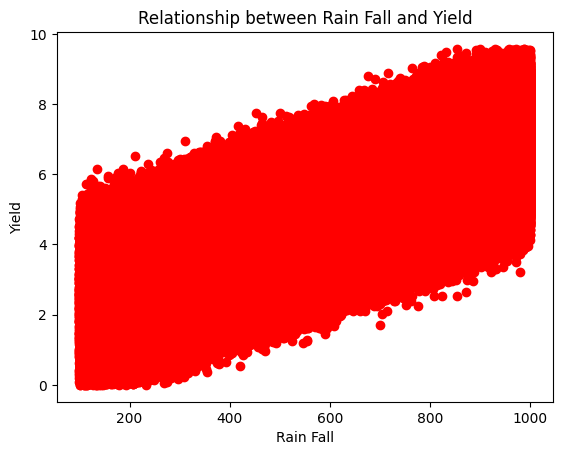

In [ ]:
# Now finding the relationship between rain_fall and yield production
plt.Figure(figsize=(8,6))
plt.scatter(dataset['Rainfall_mm'], dataset['Yield_tons_per_hectare'], color='red')
plt.title("Relationship between Rain Fall and Yield")
plt.xlabel("Rain Fall")
plt.ylabel("Yield")
plt.show()

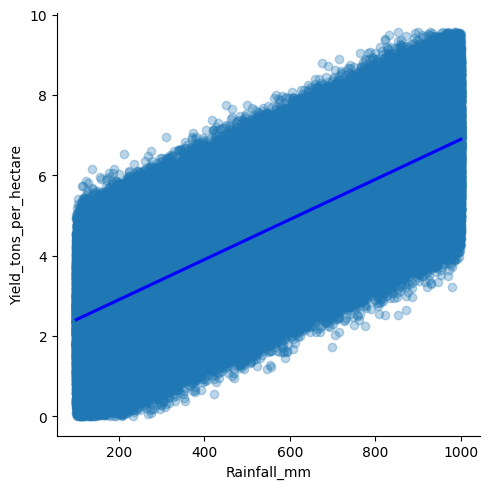

In [37]:
# This graph is to comples to find the result we use the seaborn library to show the trend line
import seaborn as sns
sns.lmplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=dataset, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})


In [41]:
# We can say that this is the direct relation but not exact direct relation. So, now we save the data as preprocessed data
import pickle
with open("preprocessed_Data.pkl", 'wb') as f:
    pickle.dump(dataset, f)